In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary fil
#es to /kaggle/temp/, but they won't be saved outside of the current session

# **Data Science Job Salaries *(Exploratory data analysis )* :-**

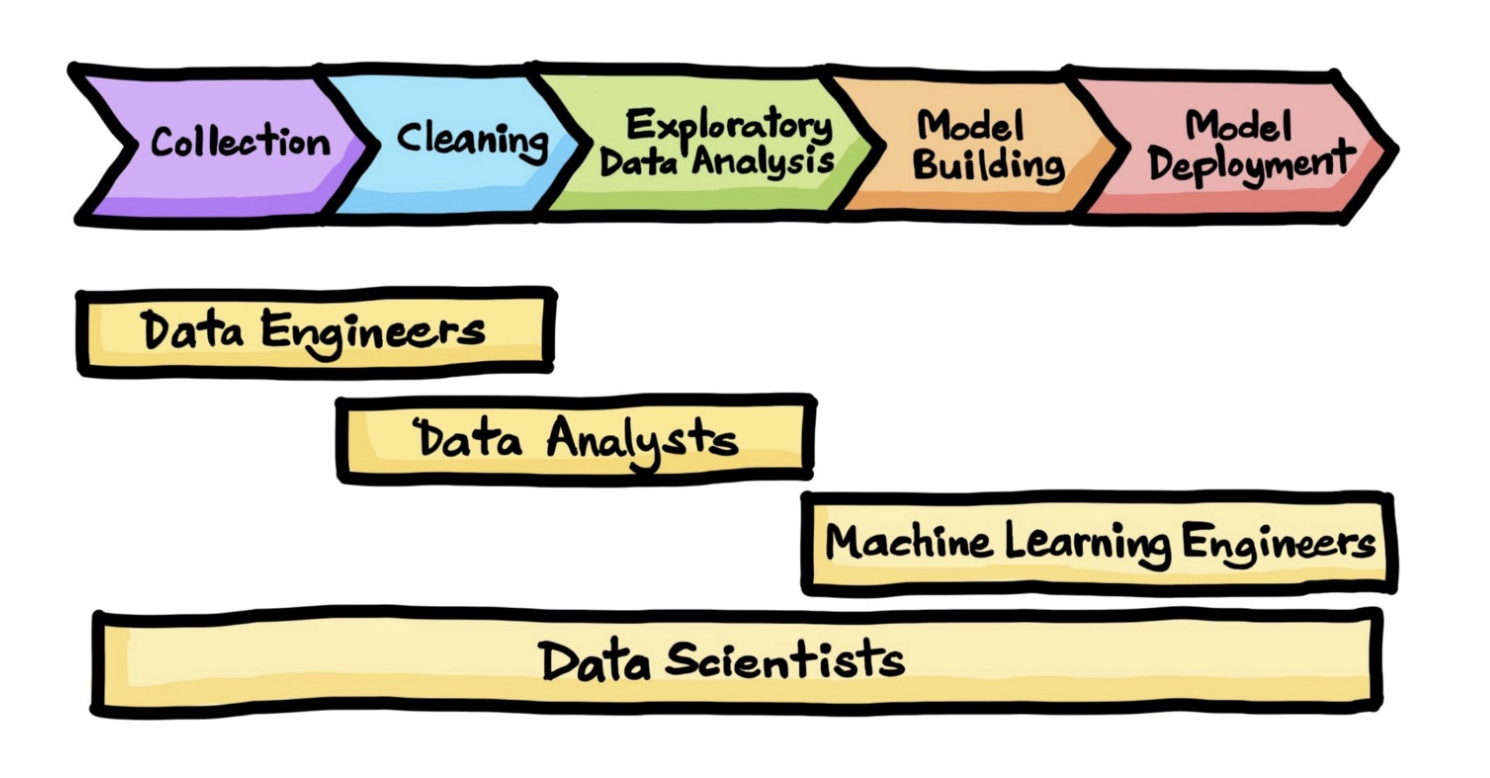

# **What is Data Science?**
Data Science can be explained as the entire process of gathering actionable insights from raw data that involves various concepts that include statistical analysis, data analysis, machine learning algorithms, data modeling, preprocessing of data, etc.

# **Who is a Data Scientist?**
Data scientists are IT professionals whose main role in an organization is to perform data wrangling on a large volume of data—structured and unstructured—after gathering and analyzing it. Data scientists need this voluminous data for multiple reasons including building hypotheses, analyzing market and customer patterns, and making inferences.

# **Data Information :-**

#### **Column	Description :-**

* work_year	The year the salary was paid.

* experience_level	The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

* employment_type	The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance

* job_title	The role worked in during the year.

* salary	The total gross salary amount paid.

* salary_currency	The currency of the salary paid as an ISO 4217 currency code.

* salary_in_usd	The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

* employee_residence	Employee's primary country of residence in during the work year as an ISO 3166 country code.

* remote_ratio	The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

* company_location	The country of the employer's main office or contracting branch as an ISO 3166 country code.

* company_size	The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

# **Importing Required Libraries :-**

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# **Loading Date-Set :-**

In [4]:
data=pd.read_csv(".//ds_salaries.csv")
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# **Basic Information Regarding Dataset :-**

In [5]:
data.shape

(607, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,607.0,303.000000,1.753701e+02,0.0,151.5,303.0,454.5,606.0
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [8]:
data.describe(exclude="object").T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,607.0,303.000000,1.753701e+02,0.0,151.5,303.0,454.5,606.0
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [9]:
data.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

# **Detection Of Missing Values :-**

In [10]:
data.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# **Dropping Irrelevant Columns :-**

In [11]:
data.drop(columns="Unnamed: 0",inplace=True)
data.drop(columns=["salary_currency"],inplace=True)

# **Data Preparation/ Data Mapping :-** 

In [12]:
data["experience_level"].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [13]:
data["experience_level"]=data["experience_level"].map({"MI":"Mid-level","SE":"Senior-level","EN":"Entry-level","EX":"Executive-level"})

In [14]:
data["experience_level"]

0         Mid-level
1      Senior-level
2      Senior-level
3         Mid-level
4      Senior-level
           ...     
602    Senior-level
603    Senior-level
604    Senior-level
605    Senior-level
606       Mid-level
Name: experience_level, Length: 607, dtype: object

In [15]:
data["employment_type"].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [16]:
data["employment_type"]=data["employment_type"].map({"FT":"Full-Time","CT":"Contract","PT":"Part-Time","FL":"Freelance"})

In [17]:
data["employment_type"]

0      Full-Time
1      Full-Time
2      Full-Time
3      Full-Time
4      Full-Time
         ...    
602    Full-Time
603    Full-Time
604    Full-Time
605    Full-Time
606    Full-Time
Name: employment_type, Length: 607, dtype: object

In [18]:
data["company_size"].unique()

array(['L', 'S', 'M'], dtype=object)

In [19]:
data["company_size"]=data["company_size"].map({"L":"Large-cap","S":"Small-cap","M":"Mid-Cap"})
data["company_size"]

0      Large-cap
1      Small-cap
2        Mid-Cap
3      Small-cap
4      Large-cap
         ...    
602      Mid-Cap
603      Mid-Cap
604      Mid-Cap
605      Mid-Cap
606    Large-cap
Name: company_size, Length: 607, dtype: object

In [20]:
data["remote_ratio"].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

In [21]:
data["remote_ratio"]=data["remote_ratio"].map({0:"No Remote",50:"Partially Remote",100:"Fully Remote"})

* remote_ratio The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

# **INSIGHTS :-**
## **Step1 :- [Univariate Analysis]**
## **Experience Analysis :-**

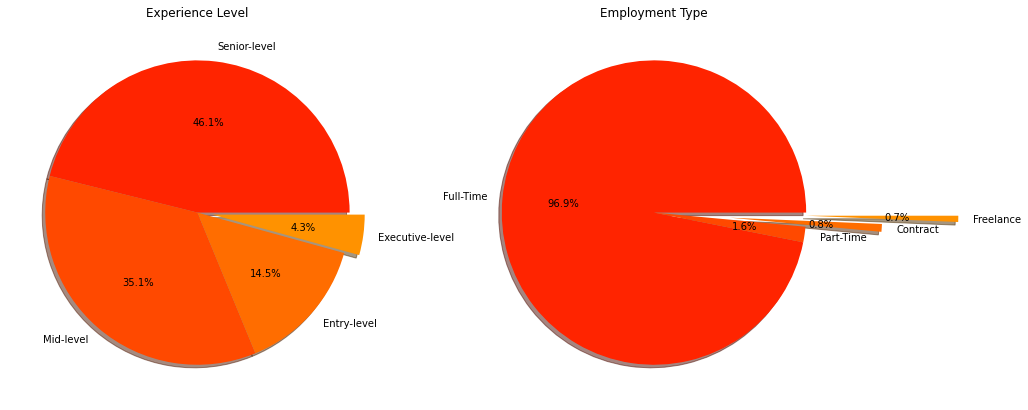

In [26]:
plt.figure(figsize=(15,7))
color=sns.set_palette("autumn")
plt.subplot(1,2,1)
k=data["experience_level"].value_counts()

plt.pie(k,labels=k.index,autopct="%0.01f%%",shadow=True,explode=[0,0,0,0.1],)
plt.title("Experience Level")

plt.subplot(1,2,2)
k1=data["employment_type"].value_counts()
plt.pie(k1,labels=k1.index,autopct="%0.1f%%",shadow=True,explode=[0,0,0.5,1])
plt.title("Employment Type")
plt.show()

* **Senior Level** Data Scientist Are In Majority Whereas **Executive-Level** are the least.
* **Full-Time** Jobs For Data Scientist Are Far More As Compared to Part-time, Contract, Freelance Jobs In Market.

# **Most Popular Job Profile In Data-Domain :-**

In [33]:
kk=data["job_title"].value_counts()[:15]
kk=kk.to_frame()
kk

,job_title
Data Scientist,143
Data Engineer,132
Data Analyst,97
Machine Learning Engineer,41
Research Scientist,16
Data Science Manager,12
Data Architect,11
Big Data Engineer,8
Machine Learning Scientist,8
Principal Data Scientist,7


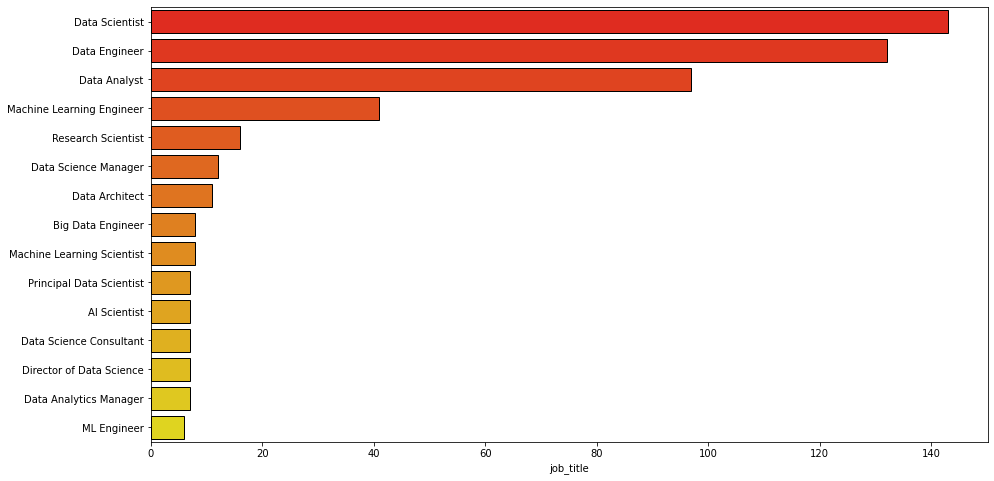

In [48]:
#job_title
plt.figure(figsize=(15,8))
sns.barplot(y=kk.index,x=kk["job_title"],palette="autumn",edgecolor="black")
plt.show()

* **Data Scientist** is Most Popular Job Profile Amongest Data-Domain.
* **Data Scientist, Data Enigneer & Data Analyst** Are Top-3 job Profiles in Data Domain. 

# **Most No. Of Data Employee Residence & Countries with Most No. Of Companies.**

In [49]:
ee=data["employee_residence"].value_counts()[:15].to_frame()
ee

,employee_residence
US,332
GB,44
IN,30
CA,29
DE,25
FR,18
ES,15
GR,13
JP,7
PT,6


In [50]:
ee1=data["company_location"].value_counts()[:15].to_frame()
ee1

,company_location
US,355
GB,47
CA,30
DE,28
IN,24
FR,15
ES,14
GR,11
JP,6
NL,4


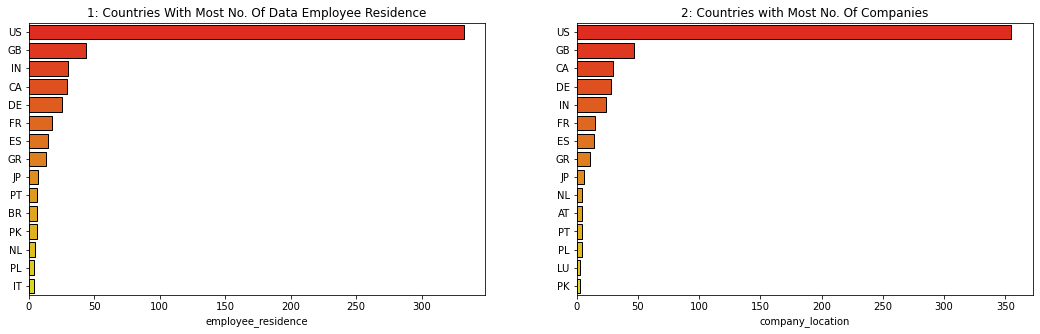

In [51]:
#employee_residence
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.barplot(y=ee.index,x=ee["employee_residence"],data=ee,palette="autumn",edgecolor="black")
plt.title("1: Countries With Most No. Of Data Employee Residence")

plt.subplot(1,2,2)
sns.barplot(y=ee1.index,x=ee1["company_location"],data=ee1,palette="autumn",edgecolor="black")
plt.title("2: Countries with Most No. Of Companies");

* **In Chart 1:** The **United States (US)** Residence Employee more work in the **Data Related Field** as Compared to Other Countries Residence.
* **In Chart 2:** The **United States (US)** Has Majority of Most NO. Of Companies Who Hire's Data Scientist/Professionals .

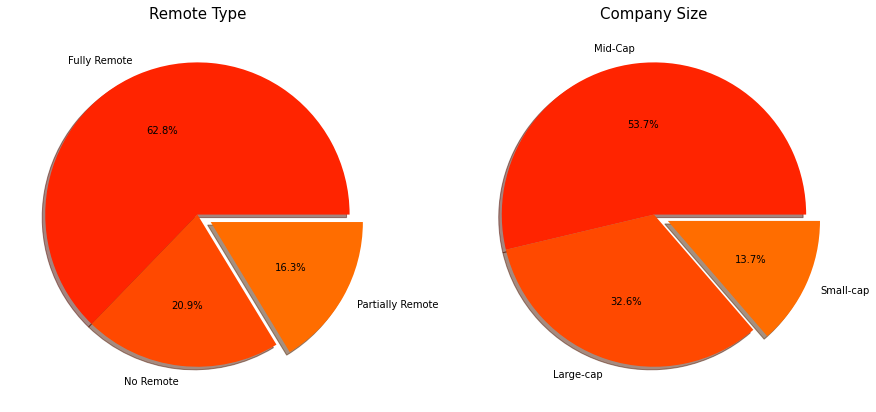

In [52]:
#remote_ratio & company_size
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ss=data["remote_ratio"].value_counts()
plt.pie(ss,labels=ss.index,autopct="%0.01f%%",shadow=True,explode=[0,0,0.1],colors=color)
plt.title("Remote Type",fontsize=15)

plt.subplot(1,2,2)
vv=data["company_size"].value_counts()
plt.pie(vv,labels=vv.index,autopct="%0.01f%%",shadow=True,explode=[0,0,0.1],colors=color)
plt.title("Company Size",fontsize=15)
plt.show()

* Majority of the employees work **Fully remotely** (60% remote work).
* **Mid-Cap** Companies Has Most No. Data Professional Employess As Compared To Large-cap ANd Small-cap Companiees.

# **Step 2 :- [Bivariate Analysis]**
# **What The Average Salaries ($) Based On Their Experience Level ?**

In [53]:
salaries=data.groupby(["experience_level"])["salary_in_usd"].mean().to_frame()
salaries

,salary_in_usd
experience_level,
Entry-level,61643.318182
Executive-level,199392.038462
Mid-level,87996.056338
Senior-level,138617.292857


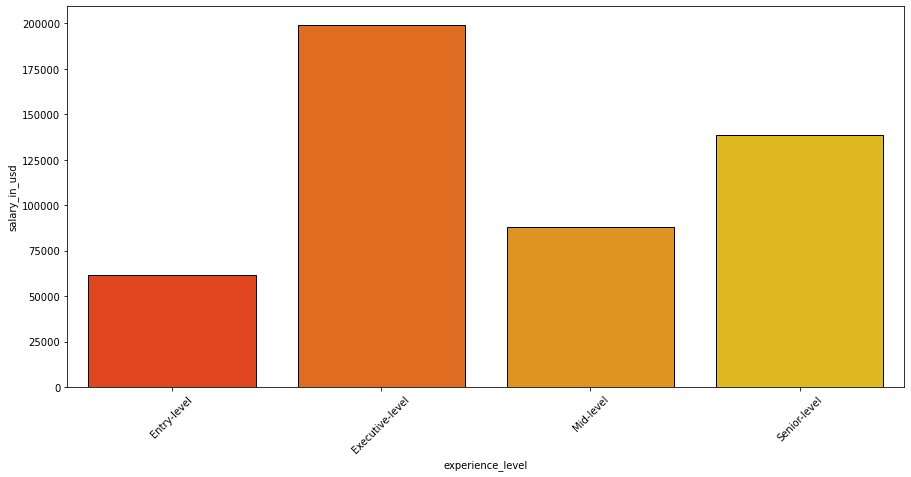

In [29]:
plt.figure(figsize=(15,7))
sns.barplot(x=salaries.index,y=salaries["salary_in_usd"],data=salaries,palette="autumn",edgecolor="black")
plt.xticks(rotation=45)
plt.show()

* Salary of **Exceutive-Level** Employee has Much Higher As Compared to Senior-Level & Mid-Level Employee.

# **What The Average Salaries($) Based On Their Employment Types ?**

In [55]:
e_type=data.groupby(["employment_type"])["salary_in_usd"].mean().to_frame()
e_type
# data

,salary_in_usd
employment_type,
Contract,184575.000000
Freelance,48000.000000
Full-Time,113468.073129
Part-Time,33070.500000


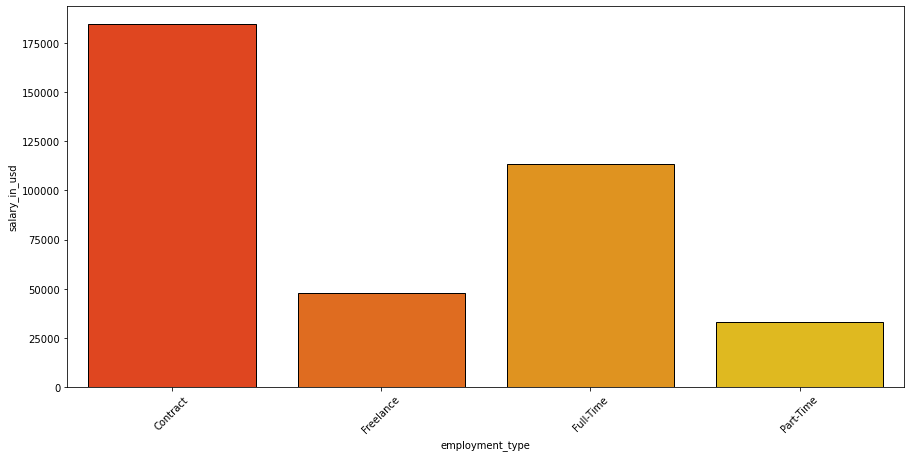

In [31]:
plt.figure(figsize=(15,7))
sns.barplot(x=e_type.index,y=e_type["salary_in_usd"],data=e_type,palette="autumn",edgecolor="black")
plt.xticks(rotation=45)
plt.show()

* Those Employees Who Work's On **Contract** Based Agreement Got Higher **Salaries** As Compared To **Full-Time Worker's Or Freelance Worker's** .

# **Which Are The Top 10 Highest Paying Job Profile ?**

In [56]:
title=data.groupby(["job_title"])["salary_in_usd"].mean().sort_values(ascending=False)[:10]
title=title.to_frame()
title

,salary_in_usd
job_title,
Data Analytics Lead,405000.000000
Principal Data Engineer,328333.333333
Financial Data Analyst,275000.000000
Principal Data Scientist,215242.428571
Director of Data Science,195074.000000
Data Architect,177873.909091
Applied Data Scientist,175655.000000
Analytics Engineer,175000.000000
Data Specialist,165000.000000


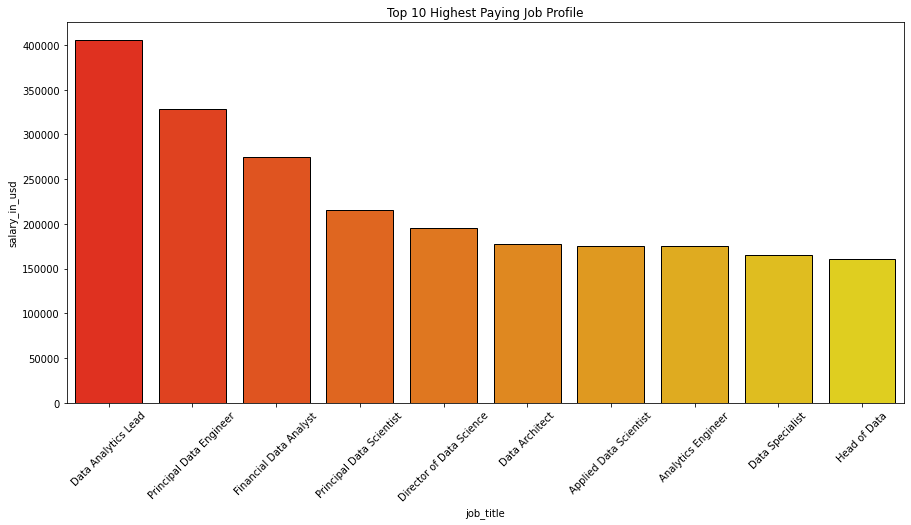

In [57]:
plt.figure(figsize=(15,7))
sns.barplot(x=title.index,y=title["salary_in_usd"],data=title,palette="autumn",edgecolor="black")
plt.xticks(rotation=45)
plt.title("Top 10 Highest Paying Job Profile")
plt.show()

* Above Chart Tells About The Top 10 Highest Paying Jobs In This Field.
* **Data Analytics Lead** Job Profile Got Higher Salaries Packages From The Companies.

# **Which Company Type Are More Flexibile Towards Remote Jobs?**

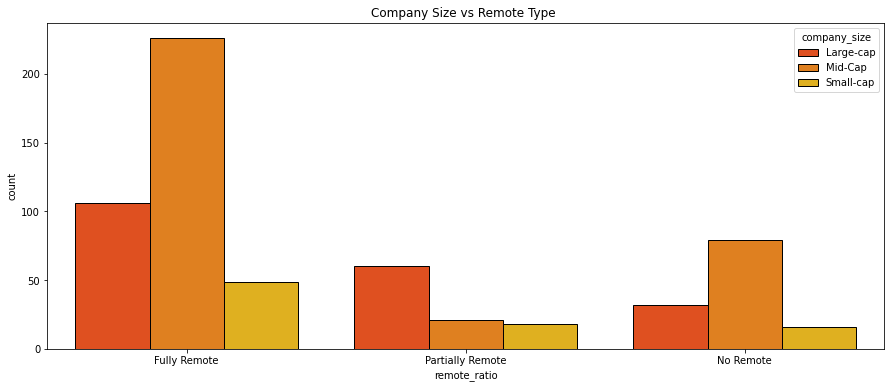

In [62]:
plt.figure(figsize=(15,6))
sns.barplot(x="remote_ratio",y="count",data=data1,hue="company_size",palette="autumn",edgecolor="black")
plt.title("Company Size vs Remote Type ");

* **Fully-Remote Jobs** are Higher In Mid-cap Company as Compared To Large-cap & Small-cap Companies.
* **Partially Remote Jobs** are Higher In Large-cap Companies as Compared To Others.
* **No-Remote Jobs** are Higher In Mid-cap Companies as Comapred to Large-cap & Small-cap Companies.

In [61]:
data1=data.groupby(["company_size"])["remote_ratio"].value_counts().to_frame().rename(columns={"remote_ratio":"count"})
data1=data1.reset_index()
data1

,company_size,remote_ratio,count
0,Large-cap,Fully Remote,106
1,Large-cap,Partially Remote,60
2,Large-cap,No Remote,32
3,Mid-Cap,Fully Remote,226
4,Mid-Cap,No Remote,79
5,Mid-Cap,Partially Remote,21
6,Small-cap,Fully Remote,49
7,Small-cap,Partially Remote,18
8,Small-cap,No Remote,16


# **Which Companies Location Which Give Higher Average Salaries to Their Data Professionals?**

In [63]:
comp_sal=data.groupby(["company_location"])["salary_in_usd"].agg(["mean"]).sort_values(by="mean",ascending=False)[:10]
comp_sal

,mean
company_location,
RU,157500.000000
US,144055.261972
NZ,125000.000000
IL,119059.000000
JP,114127.333333
AU,108042.666667
AE,100000.000000
DZ,100000.000000
IQ,100000.000000


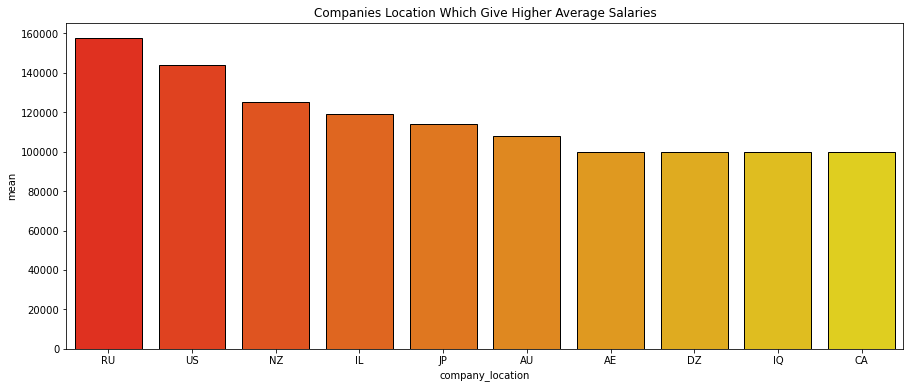

In [37]:
plt.figure(figsize=(15,6))
sns.barplot(x=comp_sal.index,y="mean",data=comp_sal,palette="autumn",edgecolor="black")
plt.title("Companies Location Which Give Higher Average Salaries");

* Companies Located In **Russia (RU)** Gives Higher Average Salaries To Their Data Professionals Employees Than **United States (US)** And Than **NewZealand (NZ).**

# **How Remote Type Jobs & Company Size Affect The Employee's Compensations?**

In [64]:
remote=data.groupby(["remote_ratio"])["salary_in_usd"].mean().to_frame()
remote

,salary_in_usd
remote_ratio,
Fully Remote,122457.454068
No Remote,106354.622047
Partially Remote,80823.030303


In [65]:
size=data.groupby(["company_size"])["salary_in_usd"].mean().to_frame()
size

,salary_in_usd
company_size,
Large-cap,119242.994949
Mid-Cap,116905.466258
Small-cap,77632.674699


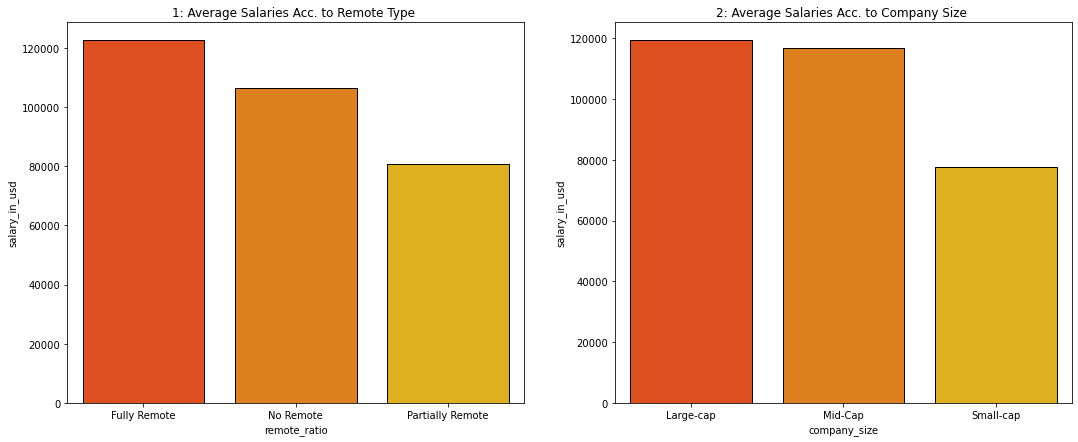

In [40]:
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.barplot(x=remote.index,y=remote["salary_in_usd"],data=remote,palette="autumn",edgecolor="black")
plt.title("1: Average Salaries Acc. to Remote Type ")

plt.subplot(1,2,2)
sns.barplot(x=size.index,y=size["salary_in_usd"],data=size,palette="autumn",edgecolor="black")
plt.title("2: Average Salaries Acc. to Company Size ")

plt.show()

* **Chart 1:** The Average Salaries of **Fully Remote** Employees Is Much Higher Than The **Partially Remote And Non Remote Employees**.
* **Chart 2:** The **Large-Cap & Mid-Cap** Companies Almost Give Equivalent Salaries to Their Employees.

# **Step 3 :- [Multi-Variate Analysis]**
# **Over Years Salaries Trend With Employment Type :-** 
### (*Full-Time, Part-Time, Freelance, Contract*)

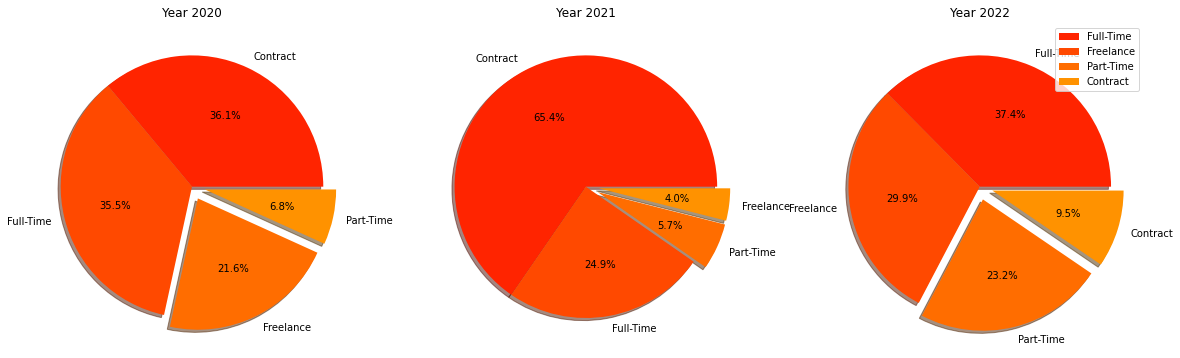

In [66]:
year1=data[data["work_year"]==2020]
yr1=year1.groupby("employment_type")["salary_in_usd"].mean().sort_values(ascending=False)

year2=data[data["work_year"]==2021]
yr2=year2.groupby("employment_type")["salary_in_usd"].mean().sort_values(ascending=False)

year3=data[data["work_year"]==2022]
yr3=year3.groupby("employment_type")["salary_in_usd"].mean().sort_values(ascending=False)

plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.pie(yr1,labels=yr1.index,autopct="%0.01f%%",explode=[0,0,0.1,0.1],shadow=True)
plt.title("Year 2020")


plt.subplot(1, 3, 2)
plt.pie(yr2,labels=yr2.index,autopct="%0.01f%%",explode=[0,0,0.1,0.1],shadow=True)
plt.title("Year 2021")


plt.subplot(1,3, 3)
plt.pie(yr3,labels=yr3.index,autopct="%0.01f%%",explode=[0,0,0.1,0.1],shadow=True)
plt.title("Year 2022")

plt.legend()

plt.show()


* In **Year-2020** The Salaries are Approx. Similar For **Contract Based & Full-Time Employment.** (36.1% & 35.5% Respectively)
* But, In **Year-2021** **Contract-Based** Got Higher Salaries (65.4%) as Compared Other Types.
* In **Year-2022** **Full-Time And Freelance** Got Higher Salaries As Compared to **Contract based and Part-Time Jobs**.

# **Over Years Salaries Distributions Of Data Professionals :-**

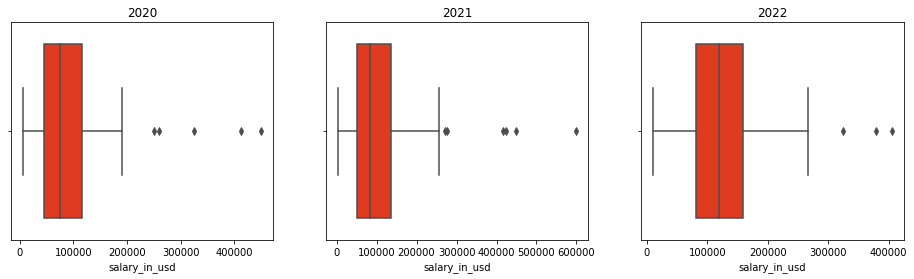

In [67]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.boxplot(year1["salary_in_usd"],)
plt.title("2020")

plt.subplot(1,3,2)
sns.boxplot(year2["salary_in_usd"],)
plt.title("2021")

plt.subplot(1,3,3)
sns.boxplot(year3["salary_in_usd"],)
plt.title("2022")

plt.show()

# **Over Years Ratio of Remote Trends In Data Jobs:-** 

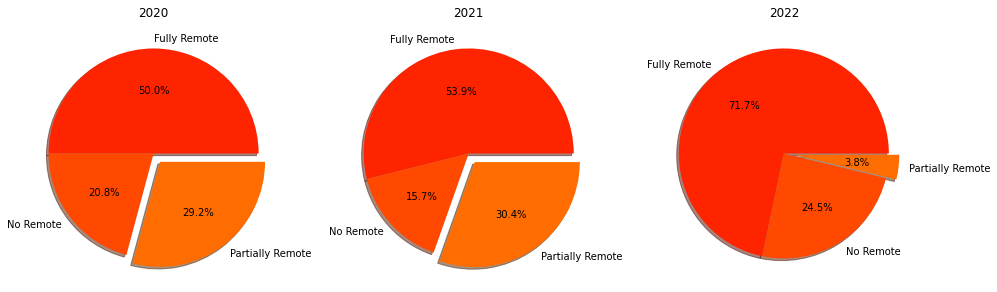

In [68]:
remote1=year1.groupby(["remote_ratio"])["remote_ratio"].count()

remote2=year2.groupby(["remote_ratio"])["remote_ratio"].count()

remote3=year3.groupby(["remote_ratio"])["remote_ratio"].count()

plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.pie(remote1,labels=remote1.index,autopct="%0.01f%%",explode=[0,0,0.1],shadow=True)
plt.title("2020")

plt.subplot(1,3,2)
plt.pie(remote2,labels=remote2.index,autopct="%0.01f%%",explode=[0,0,0.1],shadow=True)
plt.title("2021")

plt.subplot(1,3,3)
plt.pie(remote3,labels=remote3.index,autopct="%0.01f%%",explode=[0,0,0.1],shadow=True)
plt.title("2022")

plt.show()

* In **Year-2020** Their is **Fully remote** Jobs With (50.0%) & **No Remote** Jobs (20.8%) and **Partially Remote** Jobs (29.2%).
* In **Year-2021** **Fully remote and Partially Remote** Jobs Are Increased Whereas **Non remote** Jobs Are Decreased by the Time.
* In **Year-2022** **Fully remote** Jobs Increased Massively with (71.7%) and **Partially remote** Jobs Are Decreased to (3.8%)

# **Top-5 Jobs Over The Years In Data Domian:-**

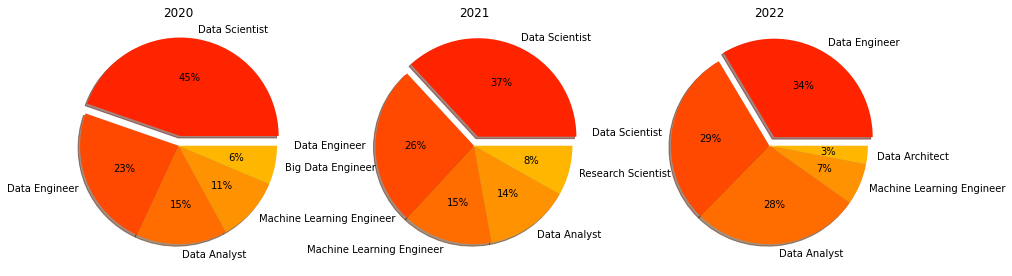

In [69]:
top1=year1["job_title"].value_counts()[:5]
top2=year2["job_title"].value_counts()[:5]
top3=year3["job_title"].value_counts()[:5]

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.pie(top1,labels=top1.index,autopct="%0.0f%%",explode=[0.1,0,0,0,0],shadow=True)
plt.title("2020")

plt.subplot(1,3,2)
plt.pie(top2,labels=top2.index,autopct="%0.0f%%",explode=[0.1,0,0,0,0],shadow=True)
plt.title("2021")

plt.subplot(1,3,3)
plt.pie(top3,labels=top3.index,autopct="%0.0f%%",explode=[0.1,0,0,0,0],shadow=True)
plt.title("2022")

plt.show()

* Above Pie Chart Indicate's Top-5 Jobs Over The Years in Data World.
* In **Year- (2020 & 2021)** :- **DATA SCIENTIST** Is The Most Popuplar Job In Data Domain,
* But In **Year- (2022)** :- **DATA ENGINEER** Is The Most Popular Job In Data Domain.

# **How Many Employees Who Are Employeed in Their Own Native Country ?**

In [73]:
location=data[data["employee_residence"]==data["company_location"]]
location1=data[data["employee_residence"]!=data["company_location"]]
k=location[["employee_residence","company_location"]].value_counts().reset_index()[:10].rename(columns={0:"count"})
k

,employee_residence,company_location,count
0,US,US,330
1,GB,GB,43
2,CA,CA,28
3,IN,IN,24
4,DE,DE,23
5,FR,FR,14
6,ES,ES,13
7,GR,GR,11
8,JP,JP,6
9,PT,PT,4


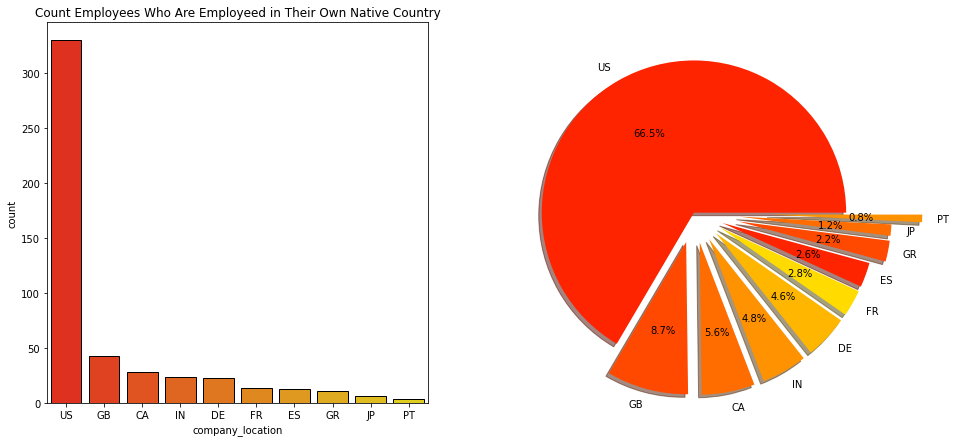

In [75]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.barplot(x=k["company_location"],y=k["count"],data=k1,palette="autumn",edgecolor="black")
plt.title("Count Employees Who Are Employeed in Their Own Native Country")

plt.subplot(1,2,2)
plt.pie(k["count"],labels=k["employee_residence"],autopct="%0.01f%%",explode=[0,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.5],shadow=True)
plt.show()

* Above Chart Indicate's The Count Employees Who Are Employeed in Their Own Native Country.
* **United States(US)** residence has massive majority in being Employed in Their Own Country.

# **How Many Employees Are Employeed In Some Other Countries ?**

In [78]:
location1=data[data["employee_residence"]!=data["company_location"]]
k1=location1[["employee_residence","company_location"]].value_counts().reset_index()[:10].rename(columns={0:"count"})
k1

,employee_residence,company_location,count
0,IN,US,4
1,BR,US,3
2,PK,DE,2
3,RU,US,2
4,AR,MX,1
5,PT,LU,1
6,MY,US,1
7,NL,DE,1
8,PH,US,1
9,PK,US,1


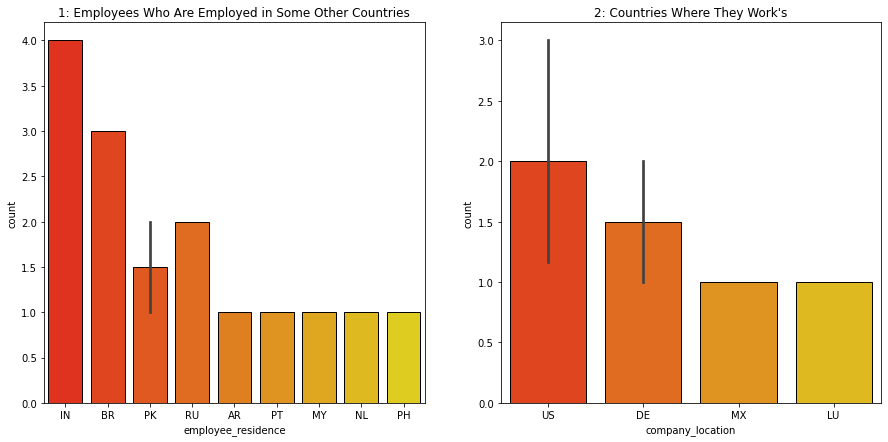

In [80]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.barplot(x=k1["employee_residence"],y=k1["count"],data=k1,palette="autumn",edgecolor="black")
plt.title("1: Employees Who Are Employed in Some Other Countries")

plt.subplot(1,2,2)
sns.barplot(x=k1["company_location"],y=k1["count"],data=k1,palette="autumn",edgecolor="black")
plt.title("2: Countries Where They Work's")
plt.show()

* In **Charts-1** Indicate's Employees Who Are Employed in Some Other Countries,
* **India** Has Highest No. Peoples Who Employed In Some Diffirent Countries. 
* In **Charts-2** Indicate's Countries Where They Work's. 

# **Which are the Highest Paying Jobs Profile In India ?**

In [81]:
india=data[data["company_location"]=="IN"]
job1=india.groupby("job_title")["salary"].agg(["mean"]).sort_values(by="mean",ascending=False)
job1

,mean
job_title,
Data Science Manager,7000000.0
Head of Machine Learning,6000000.0
Lead Data Scientist,3000000.0
Machine Learning Engineer,2239999.0
Data Scientist,1943750.0
Data Engineer,1925000.0
Lead Data Analyst,1450000.0
Big Data Engineer,1436000.0
Business Data Analyst,1400000.0


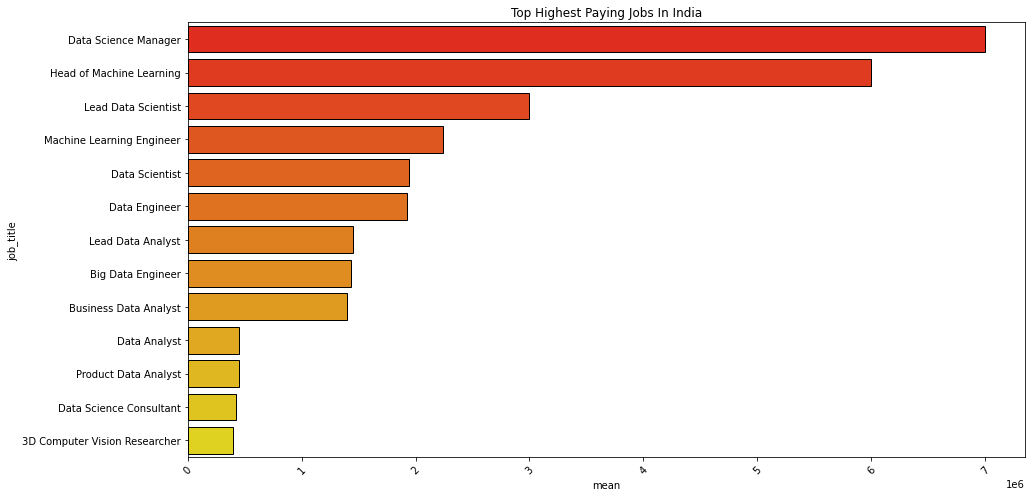

In [50]:
plt.figure(figsize=(15,8))
sns.barplot(x=job1["mean"],y=job1.index,data=job1,palette="autumn",edgecolor="black")
plt.title("Top Highest Paying Jobs In India")
plt.xticks(rotation=45)
plt.show()

* **DATA SCIENCE MANAGER & HEAD OF MACHINE LEARNING** job Profile's is Most High Paying jobs In India.